<a href="https://colab.research.google.com/github/DSI-Capstone-FS9/ABCD-MRI/blob/master/Down_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#!ls /content/drive/My\ Drive/Capstone/05_Data/

In [0]:
#!cd /content/drive/My\ Drive/Capstone/05_Data/02_Sample_MRI/ && unzip sample.zip

In [4]:
import nibabel as nib
import numpy as np
import glob

import os
from tqdm.auto import tqdm


#!pip install nilearn
#import nilearn
#!python -m pip install nilearn
# Restart kernel runtime if the package doesn't load
from nilearn import plotting

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
path = '/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/sample/'

In [0]:
all_files = glob.glob(path + '*.gz')
all_files = sorted(all_files)

In [0]:
#all_files

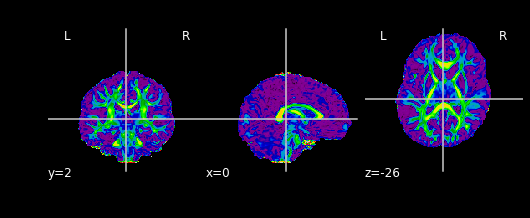

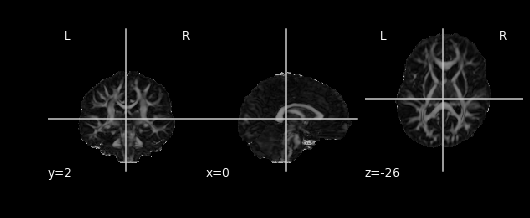

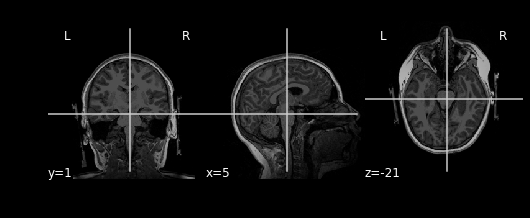

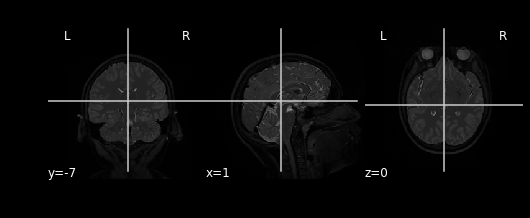

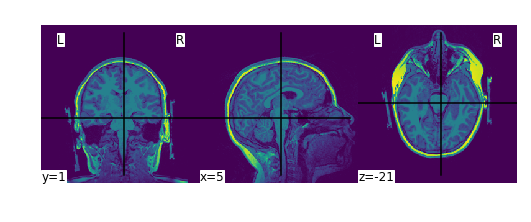

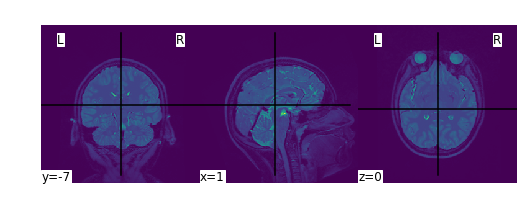

In [8]:
#plotting.plot_glass_brain(all_files[10])

# Plotting brain images
plotting.plot_epi(all_files[8])
plotting.show()

plotting.plot_anat(all_files[8])
plotting.show()


plotting.plot_anat(all_files[4])
plotting.show()
plotting.plot_anat(all_files[5])
plotting.show()


plotting.plot_img(all_files[4])
plotting.show()
plotting.plot_img(all_files[5])
plotting.show()

/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/sample/sub-NDARINV65V1Z314_T1.nii.gz


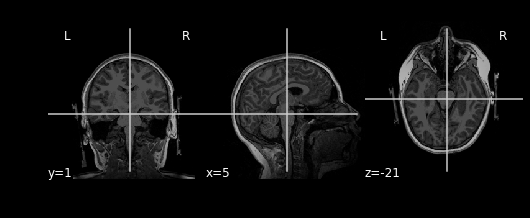

/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/sample/sub-NDARINV67KWVPR7_T1.nii.gz


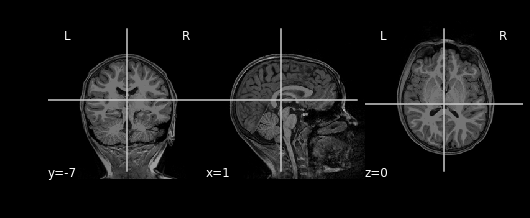

/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/sample/sub-NDARINV70EJ1089_T1.nii.gz


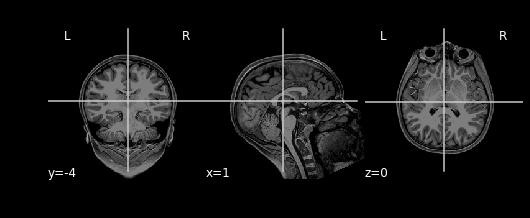

In [9]:
# Intereactive plotting - Too slow. Maybe better implementations available
#plotting.view_img_on_surf(all_files[4], threshold='90%', surf_mesh='fsaverage')

import nilearn
print(all_files[4])
plotting.plot_anat(all_files[4])
plotting.show()

print(all_files[11])
plotting.plot_anat(all_files[11])
plotting.show()

print(all_files[18])
plotting.plot_anat(all_files[18])
plotting.show()


Comparison of diffrent Sampling Techniques 

/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/sample/sub-NDARINV65V1Z314_T2.nii.gz
Orignal Shape:	 (256, 256, 256) 
Resampled Shape: (64, 64, 64)


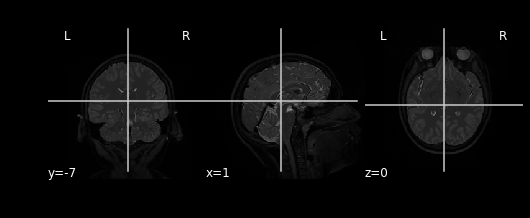

linear


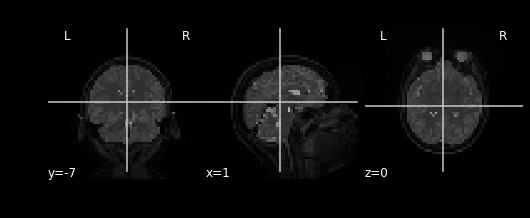

nearest


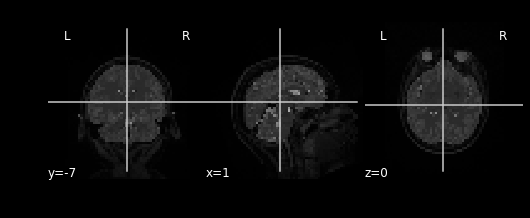

continuous


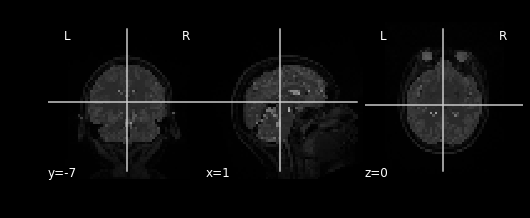

In [10]:
print("Comparison of diffrent Sampling Techniques \n")

print(all_files[5])

org = nib.load(all_files[5])
re_nearest = nilearn.image.resample_img(org, target_affine=np.eye(3)*4.1, interpolation='nearest')
re_linear = nilearn.image.resample_img(org, target_affine=np.eye(3)*4.1, interpolation='linear')
re_continuous = nilearn.image.resample_img(org, target_affine=np.eye(3)*4.1, interpolation='continuous')

print("Orignal Shape:\t {} \nResampled Shape: {}".format(org.shape,re_nearest.shape))

plotting.plot_anat(org)
plotting.show()

print("linear")
plotting.plot_anat(re_linear)
plotting.show()

print("nearest")
plotting.plot_anat(re_nearest)
plotting.show()

print("continuous")
plotting.plot_anat(re_continuous)
plotting.show()


In [11]:
# Subsetting only T1 and T2 files
all_t1_files = [i for i in all_files if i.split('/')[-1].split('.')[-3].split('_')[-1] == 'T1']
all_t2_files = [i for i in all_files if i.split('/')[-1].split('.')[-3].split('_')[-1] == 'T2']

display(all_t1_files[:2])
display(all_t2_files[:2])

['/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/sample/sub-NDARINV65V1Z314_T1.nii.gz',
 '/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/sample/sub-NDARINV67KWVPR7_T1.nii.gz']

['/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/sample/sub-NDARINV65V1Z314_T2.nii.gz',
 '/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/sample/sub-NDARINV67KWVPR7_T2.nii.gz']

In [12]:
def resample(file_list, path_to_save):
  """
    Function to resample images to 64x64x64 and save it in the path
    
  """
  
  # Checking if the directory doesn't exist then make one
  if not os.path.exists(path_to_save):
    os.makedirs(path_to_save)
  
  for file in tqdm(file_list):

    org = nib.load(file)
    re = nilearn.image.resample_img(org, target_affine=np.eye(3)*4.1, interpolation='continuous')

    # If the scaling dimensions are slightly off - to compensate 
    if re.shape == (63,63,63):
      re = nilearn.image.resample_img(org, target_affine=np.eye(3)*4., interpolation='continuous')
    elif re.shape == (65,65,65):
      re = nilearn.image.resample_img(org, target_affine=np.eye(3)*4.15, interpolation='continuous')

    # Asserting once again the shape is right
    #display(file, org.shape, re.shape)
    assert org.shape==(256,256,256)
    assert re.shape==(64,64,64)

    file_new_path = path_to_save + file.split('/')[-1]

    nib.save(img=re,filename=file_new_path)
    
    
# For T1
path_to_save = "/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/subsample/t1/"
resample(file_list=all_t1_files, path_to_save=path_to_save)

# For T2
path_to_save = "/content/drive/My Drive/Capstone/05_Data/02_Sample_MRI/subsample/t2/"
resample(file_list=all_t2_files, path_to_save=path_to_save)
